# Data Manipulation
:label:`sec_ndarray`

In order to get anything done,
we need some way to store and manipulate data.
Generally, there are two important things
we need to do with data:
(i) acquire them;
and (ii) process them once they are inside the computer.
There is no point in acquiring data
without some way to store it,
so to start, let's get our hands dirty
with $n$-dimensional arrays,
which we also call *tensors*.
If you already know the NumPy
scientific computing package,
this will be a breeze.
For all modern deep learning frameworks,
the *tensor class* (`ndarray` in MXNet,
`Tensor` in PyTorch and TensorFlow)
resembles NumPy's `ndarray`,
with a few killer features added.
First, the tensor class
supports automatic differentiation.
Second, it leverages GPUs
to accelerate numerical computation,
whereas NumPy only runs on CPUs.
These properties make neural networks
both easy to code and fast to run.



## Getting Started


(**To start, we import the PyTorch library.
Note that the package name is `torch`.**)


In [6]:
import torch

[**A tensor represents a (possibly multidimensional) array of numerical values.**]
In the one-dimensional case, i.e., when only one axis is needed for the data,
a tensor is called a *vector*.
With two axes, a tensor is called a *matrix*.
With $k > 2$ axes, we drop the specialized names
and just refer to the object as a $k^\textrm{th}$-*order tensor*.


PyTorch provides a variety of functions
for creating new tensors
prepopulated with values.
For example, by invoking `arange(n)`,
we can create a vector of evenly spaced values,
starting at 0 (included)
and ending at `n` (not included).
By default, the interval size is $1$.
Unless otherwise specified,
new tensors are stored in main memory
and designated for CPU-based computation.


In [7]:
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

Each of these values is called
an *element* of the tensor.
The tensor `x` contains 12 elements.
We can inspect the total number of elements
in a tensor via its `numel` method.


In [8]:
x.numel()

12

(**We can access a tensor's *shape***)
(the length along each axis)
by inspecting its `shape` attribute.
Because we are dealing with a vector here,
the `shape` contains just a single element
and is identical to the size.


In [9]:
x.shape

torch.Size([12])

We can [**change the shape of a tensor
without altering its size or values**],
by invoking `reshape`.
For example, we can transform
our vector `x` whose shape is (12,)
to a matrix `X`  with shape (3, 4).
This new tensor retains all elements
but reconfigures them into a matrix.
Notice that the elements of our vector
are laid out one row at a time and thus
`x[3] == X[0, 3]`.


In [18]:
X = x.reshape(3, 4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

Note that specifying every shape component
to `reshape` is redundant.
Because we already know our tensor's size,
we can work out one component of the shape given the rest.
For example, given a tensor of size $n$
and target shape ($h$, $w$),
we know that $w = n/h$.
To automatically infer one component of the shape,
we can place a `-1` for the shape component
that should be inferred automatically.
In our case, instead of calling `x.reshape(3, 4)`,
we could have equivalently called `x.reshape(-1, 4)` or `x.reshape(3, -1)`.

Practitioners often need to work with tensors
initialized to contain all 0s or 1s.
[**We can construct a tensor with all elements set to 0**] (~~or one~~)
and a shape of (2, 3, 4) via the `zeros` function.


In [10]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

Similarly, we can create a tensor
with all 1s by invoking `ones`.


In [11]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

We often wish to
[**sample each element randomly (and independently)**]
from a given probability distribution.
For example, the parameters of neural networks
are often initialized randomly.
The following snippet creates a tensor
with elements drawn from
a standard Gaussian (normal) distribution
with mean 0 and standard deviation 1.


In [14]:
torch.randn(3, 4)

tensor([[ 1.0604, -1.0804,  0.1181, -1.0772],
        [ 1.2958,  0.4884,  1.2722,  0.8018],
        [-1.3112,  0.4346,  1.5930, -1.4427]])

Finally, we can construct tensors by
[**supplying the exact values for each element**]
by supplying (possibly nested) Python list(s)
containing numerical literals.
Here, we construct a matrix with a list of lists,
where the outermost list corresponds to axis 0,
and the inner list corresponds to axis 1.


In [15]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

## Indexing and Slicing

As with  Python lists,
we can access tensor elements
by indexing (starting with 0).
To access an element based on its position
relative to the end of the list,
we can use negative indexing.
Finally, we can access whole ranges of indices
via slicing (e.g., `X[start:stop]`),
where the returned value includes
the first index (`start`) *but not the last* (`stop`).
Finally, when only one index (or slice)
is specified for a $k^\textrm{th}$-order tensor,
it is applied along axis 0.
Thus, in the following code,
[**`[-1]` selects the last row and `[1:3]`
selects the second and third rows**].


In [19]:
X = torch.arange(12, dtype=torch.float32).reshape(3, 4)
X, X[-1], X[1:3]

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

Beyond reading them, (**we can also *write* elements of a matrix by specifying indices.**)


In [20]:
X[1, 2] = 17
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

If we want [**to assign multiple elements the same value,
we apply the indexing on the left-hand side
of the assignment operation.**]
For instance, `[:2, :]`  accesses
the first and second rows,
where `:` takes all the elements along axis 1 (column).
While we discussed indexing for matrices,
this also works for vectors
and for tensors of more than two dimensions.


In [21]:
X[:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

## Operations

Now that we know how to construct tensors
and how to read from and write to their elements,
we can begin to manipulate them
with various mathematical operations.
Among the most useful of these
are the *elementwise* operations.
These apply a standard scalar operation
to each element of a tensor.
For functions that take two tensors as inputs,
elementwise operations apply some standard binary operator
on each pair of corresponding elements.
We can create an elementwise function
from any function that maps
from a scalar to a scalar.

In mathematical notation, we denote such
*unary* scalar operators (taking one input)
by the signature
$f: \mathbb{R} \rightarrow \mathbb{R}$.
This just means that the function maps
from any real number onto some other real number.
Most standard operators, including unary ones like $e^x$, can be applied elementwise.


In [22]:
x,torch.exp(x)

(tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 tensor([1.0000e+00, 2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01, 1.4841e+02,
         4.0343e+02, 1.0966e+03, 2.9810e+03, 8.1031e+03, 2.2026e+04, 5.9874e+04]))

Likewise, we denote *binary* scalar operators,
which map pairs of real numbers
to a (single) real number
via the signature
$f: \mathbb{R}, \mathbb{R} \rightarrow \mathbb{R}$.
Given any two vectors $\mathbf{u}$
and $\mathbf{v}$ *of the same shape*,
and a binary operator $f$, we can produce a vector
$\mathbf{c} = F(\mathbf{u},\mathbf{v})$
by setting $c_i \gets f(u_i, v_i)$ for all $i$,
where $c_i, u_i$, and $v_i$ are the $i^\textrm{th}$ elements
of vectors $\mathbf{c}, \mathbf{u}$, and $\mathbf{v}$.
Here, we produced the vector-valued
$F: \mathbb{R}^d, \mathbb{R}^d \rightarrow \mathbb{R}^d$
by *lifting* the scalar function
to an elementwise vector operation.
The common standard arithmetic operators
for addition (`+`), subtraction (`-`),
multiplication (`*`), division (`/`),
and exponentiation (`**`)
have all been *lifted* to elementwise operations
for identically-shaped tensors of arbitrary shape.


In [23]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In addition to elementwise computations,
we can also perform linear algebraic operations,
such as dot products and matrix multiplications.
We will elaborate on these
in :numref:`sec_linear-algebra`.

We can also [***concatenate* multiple tensors,**]
stacking them end-to-end to form a larger one.
We just need to provide a list of tensors
and tell the system along which axis to concatenate.
The example below shows what happens when we concatenate
two matrices along rows (axis 0)
instead of columns (axis 1).
We can see that the first output's axis-0 length ($6$)
is the sum of the two input tensors' axis-0 lengths ($3 + 3$);
while the second output's axis-1 length ($8$)
is the sum of the two input tensors' axis-1 lengths ($4 + 4$).


In [24]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

Sometimes, we want to
[**construct a binary tensor via *logical statements*.**]
Take `X == Y` as an example.
For each position `i, j`, if `X[i, j]` and `Y[i, j]` are equal,
then the corresponding entry in the result takes value `1`,
otherwise it takes value `0`.


In [25]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

[**Summing all the elements in the tensor**] yields a tensor with only one element.


In [26]:
X.sum()

tensor(66.)

## Broadcasting
:label:`subsec_broadcasting`

By now, you know how to perform
elementwise binary operations
on two tensors of the same shape.
Under certain conditions,
even when shapes differ,
we can still [**perform elementwise binary operations
by invoking the *broadcasting mechanism*.**]
Broadcasting works according to
the following two-step procedure:
(i) expand one or both arrays
by copying elements along axes with length 1
so that after this transformation,
the two tensors have the same shape;
(ii) perform an elementwise operation
on the resulting arrays.


In [28]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

Since `a` and `b` are $3\times1$
and $1\times2$ matrices, respectively,
their shapes do not match up.
Broadcasting produces a larger $3\times2$ matrix
by replicating matrix `a` along the columns
and matrix `b` along the rows
before adding them elementwise.


In [29]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

## Saving Memory

[**Running operations can cause new memory to be
allocated to host results.**]
For example, if we write `Y = X + Y`,
we dereference the tensor that `Y` used to point to
and instead point `Y` at the newly allocated memory.
We can demonstrate this issue with Python's `id()` function,
which gives us the exact address
of the referenced object in memory.
Note that after we run `Y = Y + X`,
`id(Y)` points to a different location.
That is because Python first evaluates `Y + X`,
allocating new memory for the result
and then points `Y` to this new location in memory.


In [30]:
before = id(Y)
Y = Y + X
id(Y) == before

False

This might be undesirable for two reasons.
First, we do not want to run around
allocating memory unnecessarily all the time.
In machine learning, we often have
hundreds of megabytes of parameters
and update all of them multiple times per second.
Whenever possible, we want to perform these updates *in place*.
Second, we might point at the
same parameters from multiple variables.
If we do not update in place,
we must be careful to update all of these references,
lest we spring a memory leak
or inadvertently refer to stale parameters.


Fortunately, (**performing in-place operations**) is easy.
We can assign the result of an operation
to a previously allocated array `Y`
by using slice notation: `Y[:] = <expression>`.
To illustrate this concept,
we overwrite the values of tensor `Z`,
after initializing it, using `zeros_like`,
to have the same shape as `Y`.


In [32]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 138912504096976
id(Z): 138912504096976


[**If the value of `X` is not reused in subsequent computations,
we can also use `X[:] = X + Y` or `X += Y`
to reduce the memory overhead of the operation.**]


In [31]:
before = id(X)
X += Y
id(X) == before

True

## Conversion to Other Python Objects


[**Converting to a NumPy tensor (`ndarray`)**], or vice versa, is easy.
The torch tensor and NumPy array
will share their underlying memory,
and changing one through an in-place operation
will also change the other.


In [ ]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

To (**convert a size-1 tensor to a Python scalar**),
we can invoke the `item` function or Python's built-in functions.


In [ ]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

## Summary

The tensor class is the main interface for storing and manipulating data in deep learning libraries.
Tensors provide a variety of functionalities including construction routines; indexing and slicing; basic mathematics operations; broadcasting; memory-efficient assignment; and conversion to and from other Python objects.


## Exercises

1. Run the code in this section. Change the conditional statement `X == Y` to `X < Y` or `X > Y`, and then see what kind of tensor you can get.
1. Replace the two tensors that operate by element in the broadcasting mechanism with other shapes, e.g., 3-dimensional tensors. Is the result the same as expected?


1.

In [33]:
X, Y

(tensor([[ 2.,  3.,  8.,  9.],
         [ 9., 12., 15., 18.],
         [20., 21., 22., 23.]]),
 tensor([[ 2.,  2.,  6.,  6.],
         [ 5.,  7.,  9., 11.],
         [12., 12., 12., 12.]]))

In [34]:
X<Y

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [35]:
X>Y

tensor([[False,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]])

2.

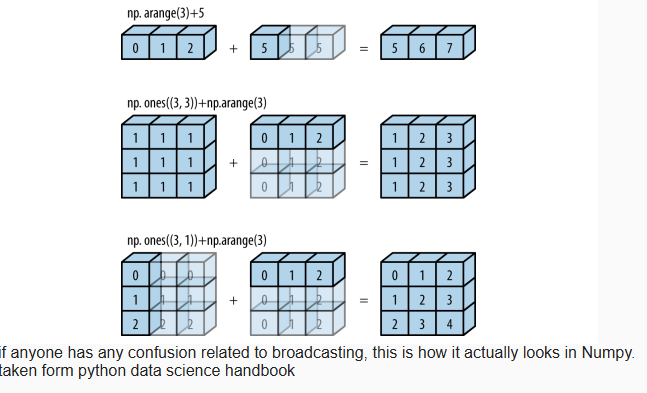

In [42]:
a=torch.tensor([[2,3,2],[9,6,1], [5,4,6]])
b=torch.arange(3)
a,b, a.shape, b.shape

(tensor([[2, 3, 2],
         [9, 6, 1],
         [5, 4, 6]]),
 tensor([0, 1, 2]),
 torch.Size([3, 3]),
 torch.Size([3]))

In [43]:
a+b

tensor([[2, 4, 4],
        [9, 7, 3],
        [5, 5, 8]])